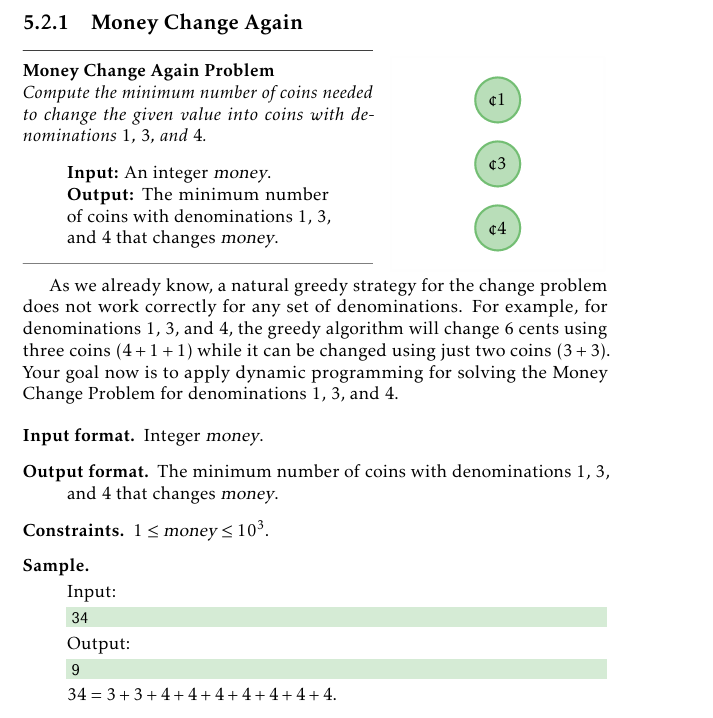

In [5]:
def min_coins(money,coins):
    # Initialize the dp array with a large value (infinity)
    dp = [float('inf')] * (money + 1)
    dp[0] = 0  # Base case: 0 coins needed to make amount 0
    
    for coin in coins:
        # Loop to calculate the minimum coins for each amount
        for i in range(1, money + 1):
            if money >= coin:
                dp[i] = min(dp[i], dp[i - coin] + 1)
                
            
        
    return dp[money]

# Example usage
money = 34
coins =[1, 3, 4]
print(min_coins(money, coins))  # Output: 9

money = 9
coins =[1, 5, 6]
print(min_coins(money, coins))  # Output: 9



9
4


**Time Complexity**

The algorithm iterates from 

1 to 
𝑚
𝑜
𝑛
𝑒
𝑦
money and performs a constant number of operations (
3
) for each amount:

𝑂
(
𝑚
𝑜
𝑛
𝑒
𝑦
)


**Space Complexity**


The algorithm uses a single array of size 
𝑚
𝑜
𝑛
𝑒
𝑦
+
1
 to store the results of subproblems:

𝑂
(
𝑚
𝑜
𝑛
𝑒
𝑦
)


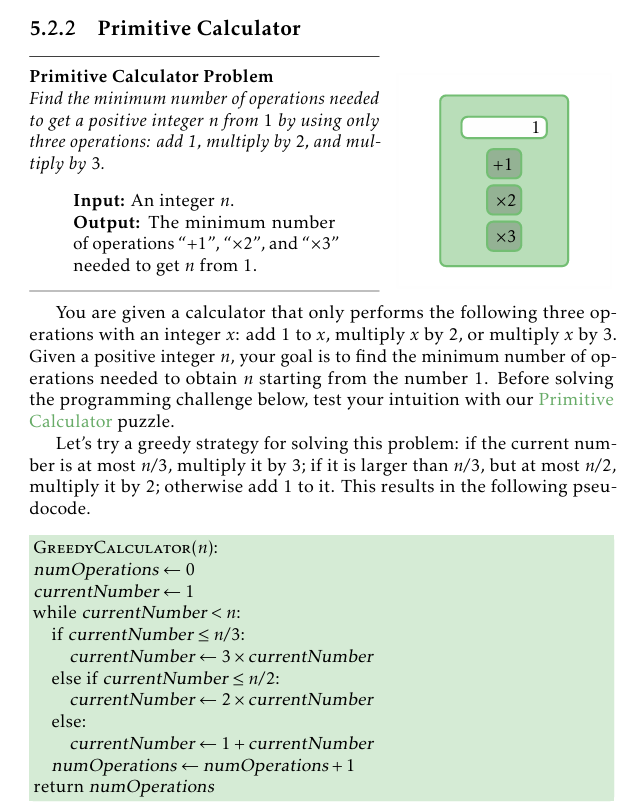
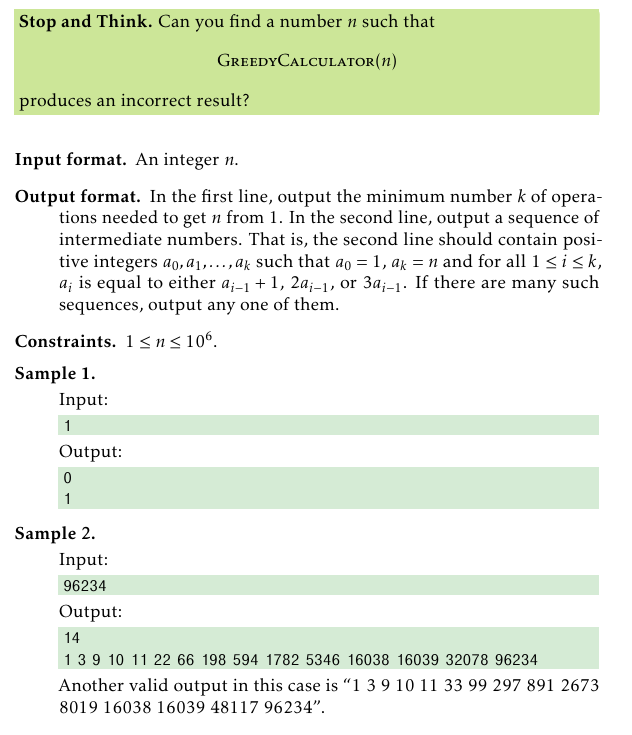

In [6]:
def primitive_calculator(n):
    # Initialize dp array and parent array
    dp = [0] * (n + 1)
    parent = [0] * (n + 1)

    # Fill dp array
    for i in range(2, n + 1):
        # Start with the "+1" operation
        dp[i] = dp[i - 1] + 1
        parent[i] = i - 1

        # Check for "×2" operation
        if i % 2 == 0 and dp[i // 2] + 1 < dp[i]:
            dp[i] = dp[i // 2] + 1
            parent[i] = i // 2

        # Check for "×3" operation
        if i % 3 == 0 and dp[i // 3] + 1 < dp[i]:
            dp[i] = dp[i // 3] + 1
            parent[i] = i // 3

    # Reconstruct the sequence of operations
    sequence = []
    current = n
    while current > 0:
        sequence.append(current)
        current = parent[current]

    sequence.reverse()
    return dp[n], sequence

# Example usage
n =  1
min_operations, sequence = primitive_calculator(n)
print("Minimum operations:", min_operations)
print("Sequence:", sequence)

print()
n =  96234
min_operations, sequence = primitive_calculator(n)
print("Minimum operations:", min_operations)
print("Sequence:", sequence)


Minimum operations: 0
Sequence: [1]

Minimum operations: 14
Sequence: [1, 3, 9, 10, 11, 33, 99, 297, 891, 2673, 8019, 16038, 16039, 48117, 96234]


**Time Complexity**
The algorithm processes each number from 

2 to 
𝑛
, and for each number, performs a constant number of operations to evaluate possible transitions:

𝑂
(
𝑛
)

**Space Complexity**
Two arrays, dp and parent, of size 
𝑛
+
1
 are used:

𝑂
(
𝑛
)


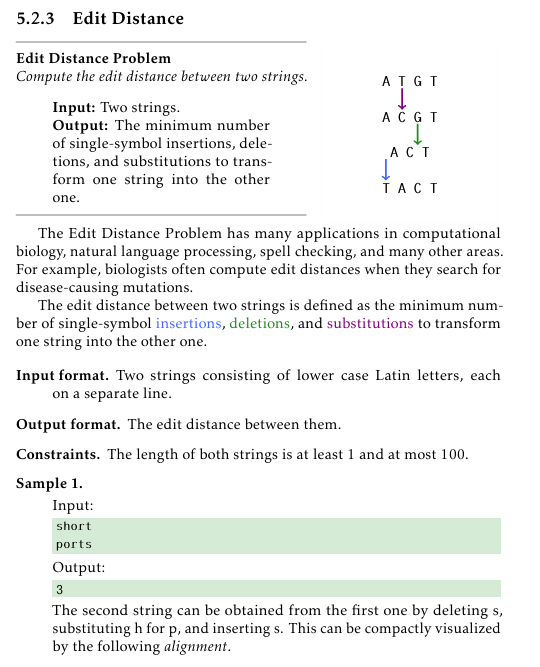
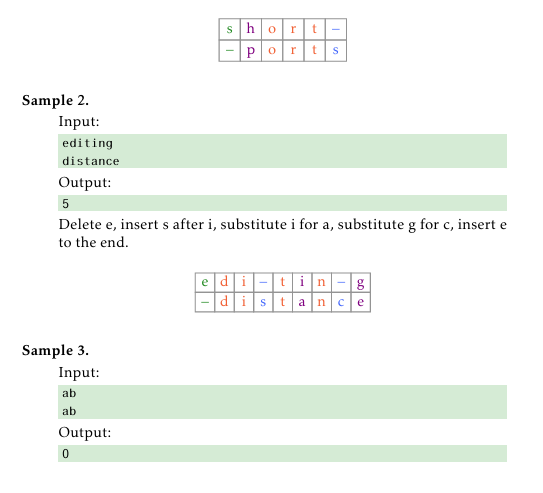

In [13]:
def edit_distance(A, B):
    m, n = len(A), len(B)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Base cases
    for i in range(m + 1):
        dp[i][0] = i  # Deleting all characters of A
    for j in range(n + 1):
        dp[0][j] = j  # Inserting all characters of B

    # Fill dp array
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if A[i - 1] == B[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]  # No operation needed
            else:
                dp[i][j] = 1 + min(dp[i - 1][j - 1], dp[i][j - 1], dp[i - 1][j])

    return dp[m][n]

# Example usage
A = "editing"
B = "distance"
print(edit_distance(A, B))  # Output: 5

# Example usage
A = "ab"
B = "ab"
print(edit_distance(A, B))  # Output: 0

# Example usage
A = "short"
B = "ports"
print(edit_distance(A, B))  # Output: 3




5
0
3


**Time Complexity**

The algorithm iterates over all substrings of 

A and B, filling an 
𝑚
×
𝑛
 matrix:

𝑂
(
𝑚
⋅
𝑛
)

**Space Complexity**
The algorithm uses a 2D array of size 
𝑚
+
1
×
𝑛
+
1
:

𝑂
(
𝑚
⋅
𝑛
)


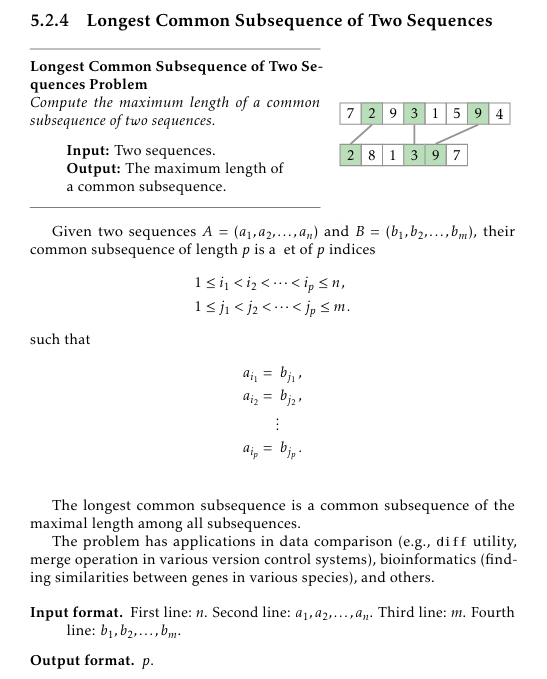
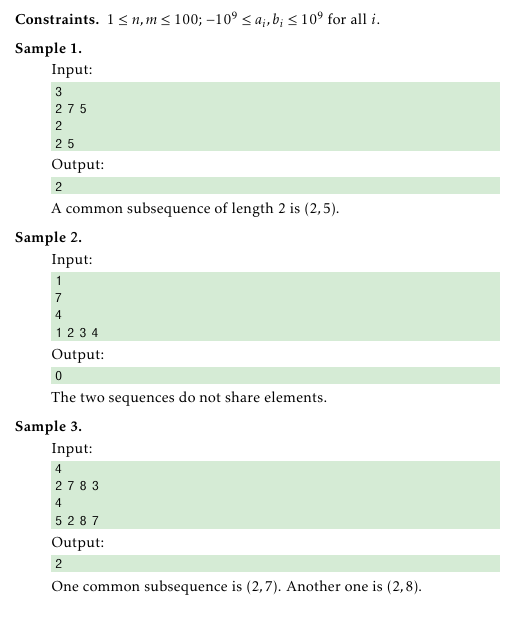

In [11]:
def longest_common_subsequence(A, B):
    n, m = len(A), len(B)
    dp = [[0] * (m + 1) for _ in range(n + 1)]

    # Fill the dp table
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if A[i - 1] == B[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    return dp[n][m]

# Example usage
A = [2, 7, 8, 3]
B = [5, 2, 8, 7]
print(longest_common_subsequence(A, B))  # Output: 2


# Example usage
A = [7]
B = [1, 2, 3, 4]
print(longest_common_subsequence(A, B))  # Output: 0

# Example usage
A = [2, 7, 5]
B = [2, 5]
print(longest_common_subsequence(A, B))  # Output: 2

2
0
2


**Time Complexity**
The algorithm computes values for all pairs of indices 
𝑖
,
𝑗
 where 
1
≤
𝑖
≤
𝑛
and 
1
≤
𝑗
≤
𝑚
:
𝑂
(
𝑛
⋅
𝑚
)

**Space Complexity**
The space required to store the 
𝑑
𝑝
 table is:
𝑂
(
𝑛
⋅
𝑚
)


## Optimized Space Complexity
We can reduce space complexity to 
𝑂
(
min
⁡
(
𝑛
,
𝑚
)
)
by maintaining only two rows of the DP table (current and previous):

In [ ]:

def lcs_optimized(A, B):
    if len(A) < len(B):
        A, B = B, A  # Ensure A is the longer sequence

    n, m = len(A), len(B)
    prev = [0] * (m + 1)
    curr = [0] * (m + 1)

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if A[i - 1] == B[j - 1]:
                curr[j] = prev[j - 1] + 1
            else:
                curr[j] = max(prev[j], curr[j - 1])
        prev, curr = curr, prev

    return prev[m]

# Example usage
print(lcs_optimized([2, 7, 8, 3], [5, 2, 8, 7]))  # Output: 2



2


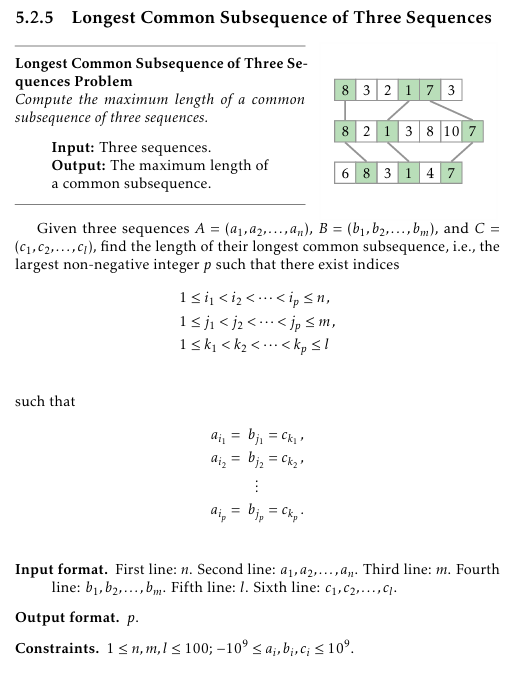
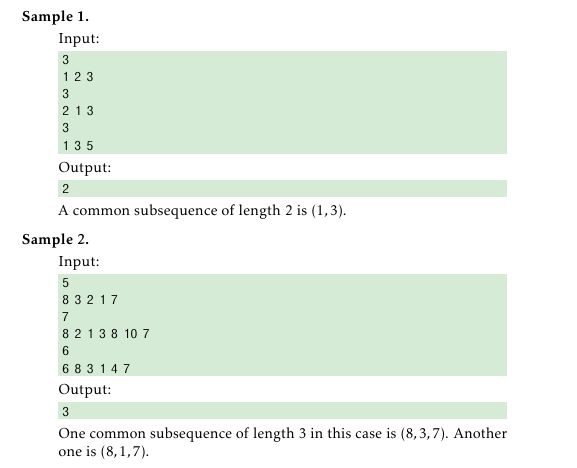

In [13]:
def lcs_of_three(A, B, C):
    n, m, l = len(A), len(B), len(C)
    # Create a 3D DP table initialized to 0
    dp = [[[0] * (l + 1) for _ in range(m + 1)] for __ in range(n + 1)]

    # Fill the dp table
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            for k in range(1, l + 1):
                if A[i - 1] == B[j - 1] == C[k - 1]:
                    dp[i][j][k] = dp[i - 1][j - 1][k - 1] + 1
                else:
                    dp[i][j][k] = max(dp[i - 1][j][k], dp[i][j - 1][k], dp[i][j][k - 1])

    return dp[n][m][l]

# Example usage
A = [8, 3, 2, 1, 7]
B = [8, 2, 1, 3, 8, 10, 7]
C = [6, 8, 3, 1, 4, 7]
print(lcs_of_three(A, B, C))  # Output: 3


3


**Time Complexity**
The algorithm computes values for all combinations of indices 
𝑖
,
𝑗
,
𝑘
where 
1
≤
𝑖
≤
𝑛
, 
1
≤
𝑗
≤
𝑚
, and 
1
≤
𝑘
≤
𝑙
:
𝑂
(
𝑛
⋅
𝑚
⋅
𝑙
)

**Space Complexity**
The space required to store the DP table is:
𝑂
(
𝑛
⋅
𝑚
⋅
𝑙
)


## Optimized Space Complexity
It is possible to optimize the space complexity to 
𝑂
(
2
⋅
𝑚
⋅
𝑙
)
by keeping only two layers of the DP table (current and previous layers):

In [14]:
def lcs_three_optimized(A, B, C):
    n, m, l = len(A), len(B), len(C)
    prev = [[0] * (l + 1) for _ in range(m + 1)]
    curr = [[0] * (l + 1) for _ in range(m + 1)]

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            for k in range(1, l + 1):
                if A[i - 1] == B[j - 1] == C[k - 1]:
                    curr[j][k] = prev[j - 1][k - 1] + 1
                else:
                    curr[j][k] = max(prev[j][k], curr[j - 1][k], curr[j][k - 1])
        prev, curr = curr, prev

    return prev[m][l]

# Example usage
print(lcs_three_optimized([8, 3, 2, 1, 7], [8, 2, 1, 3, 8, 10, 7], [6, 8, 3, 1, 4, 7]))  # Output: 3


3


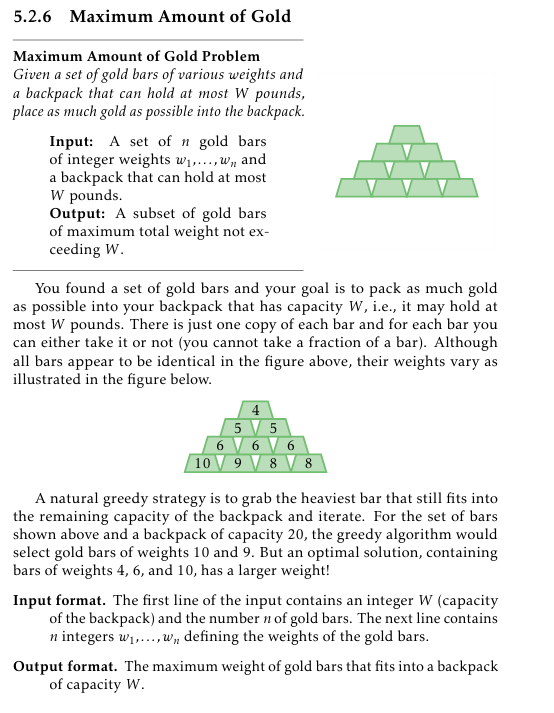
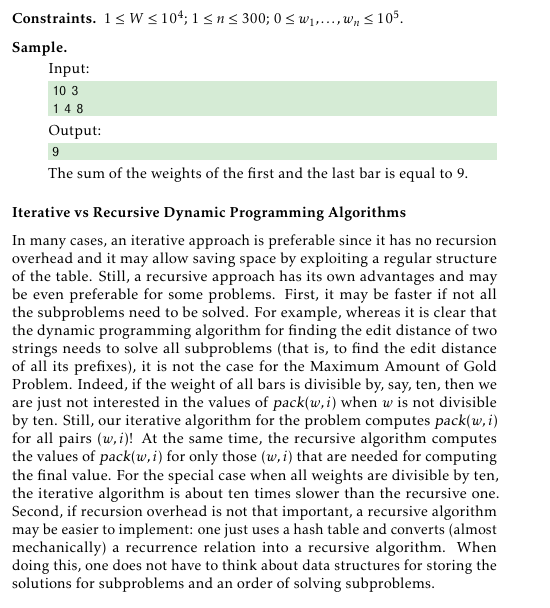

In [15]:
def maximum_gold(W, weights):
    n = len(weights)
    # Create a DP table initialized to 0
    dp = [[0] * (W + 1) for _ in range(n + 1)]

    # Fill the DP table
    for i in range(1, n + 1):
        for w in range(W + 1):
            dp[i][w] = dp[i - 1][w]  # Do not include the i-th bar
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i][w], dp[i - 1][w - weights[i - 1]] + weights[i - 1])

    return dp[n][W]

# Example usage
W = 10
weights = [1, 4, 8]
print(maximum_gold(W, weights))  # Output: 9


9


## Optimized Space Complexity
The space complexity can be reduced to 
𝑂
(
𝑊
)
by maintaining only the current and previous rows of the DP table:

In [16]:
def maximum_gold_optimized(W, weights):
    n = len(weights)
    prev = [0] * (W + 1)

    for i in range(1, n + 1):
        curr = prev[:]  # Copy the previous row
        for w in range(W + 1):
            if weights[i - 1] <= w:
                curr[w] = max(prev[w], prev[w - weights[i - 1]] + weights[i - 1])
        prev = curr

    return prev[W]

# Example usage
W = 10
weights = [1, 4, 8]
print(maximum_gold_optimized(W, weights))  # Output: 9



9


**Time Complexity**: 
𝑂
(
𝑛
⋅
𝑊
)
— We process each gold bar for every weight up to 
𝑊

**Space Complexity**:

Standard DP: 
𝑂
(
𝑛
⋅
𝑊
)
Optimized DP: 
𝑂
(
𝑊
)
This makes the solution efficient even for the upper constraint of 
𝑊 = 10^4
and 𝑛 = 300


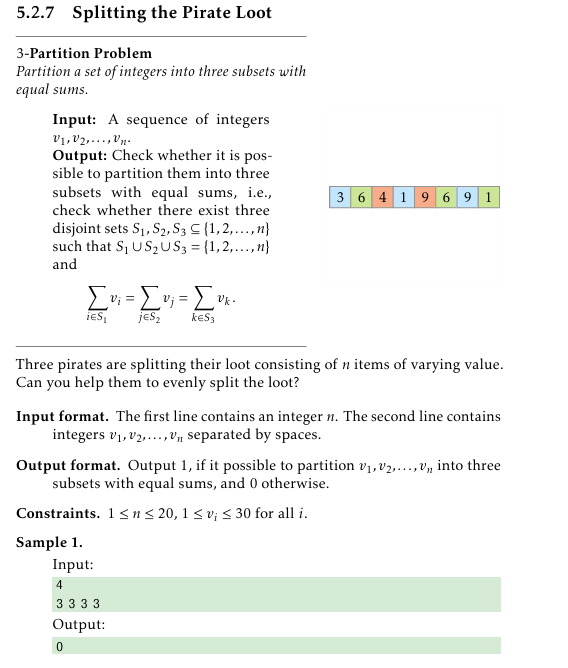
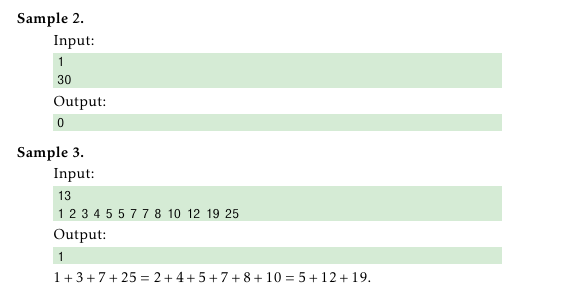


In [23]:
def can_partition_into_three_subsets(n, nums):
    total_sum = sum(nums)
    if total_sum % 3 != 0:
        return 0
    
    target = total_sum // 3
    dp = {}

    def dfs(index, subset1, subset2):
        if subset1 > target or subset2 > target:
            return False
        if index == n:
            return subset1 == target and subset2 == target
        
        state = (index, subset1, subset2)
        if state in dp:
            return dp[state]
        
        # Try placing the current element in subset1
        include_in_subset1 = dfs(index + 1, subset1 + nums[index], subset2)
        
        # Try placing the current element in subset2
        include_in_subset2 = dfs(index + 1, subset1, subset2 + nums[index])
        
        # Try skipping the current element (goes to the third subset)
        include_in_subset3 = dfs(index + 1, subset1, subset2)
        
        dp[state] = include_in_subset1 or include_in_subset2 or include_in_subset3
        return dp[state]
    
    return 1 if dfs(0, 0, 0) else 0

# Example Usage:
n = 13
nums = [1, 2, 3, 4, 5, 5, 7, 8, 10, 12, 19, 25]
print(can_partition_into_three_subsets(n, nums))  # Output: 1




0


**Time Complexity:**
The time complexity of the algorithm is 
𝑂
(
𝑛
⋅
𝑡
𝑎
𝑟
𝑔
𝑒
𝑡
^ 2
)
, where:
𝑛
is the number of elements.
𝑡
𝑎
𝑟
𝑔
𝑒
𝑡
is the target sum for each subset.

**Space Complexity:**
The space complexity is 
𝑂
(
𝑛
⋅
𝑡
𝑎
𝑟
𝑔
𝑒
𝑡
^ 2
)
due to the 3D DP table.

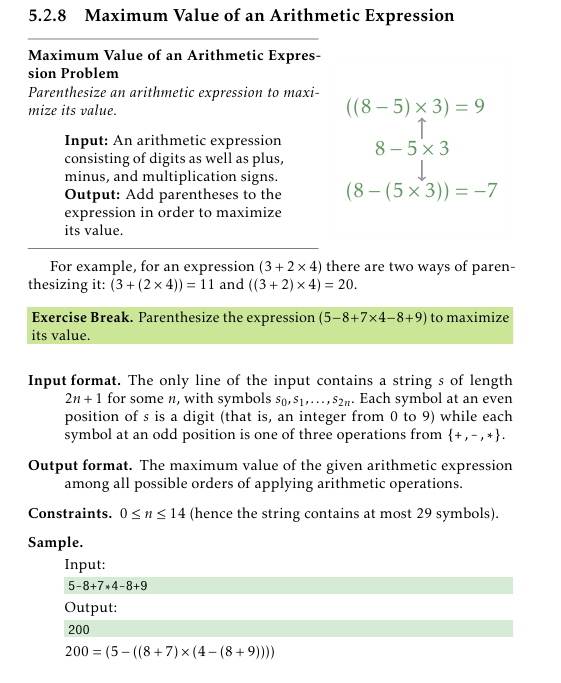

In [24]:
def eval(a, b, op):
    if op == '+':
        return a + b
    elif op == '-':
        return a - b
    elif op == '*':
        return a * b

def get_min_and_max(i, j, ops, m, M):
    min_val = float('inf')
    max_val = float('-inf')

    for k in range(i, j):
        op = ops[k]
        a = eval(M[i][k], M[k + 1][j], op)
        b = eval(M[i][k], m[k + 1][j], op)
        c = eval(m[i][k], M[k + 1][j], op)
        d = eval(m[i][k], m[k + 1][j], op)
        min_val = min(min_val, a, b, c, d)
        max_val = max(max_val, a, b, c, d)

    return min_val, max_val

def maximize_expression(expression):
    digits = list(map(int, expression[0::2]))
    ops = list(expression[1::2])

    n = len(digits)
    m = [[0] * n for _ in range(n)]
    M = [[0] * n for _ in range(n)]

    # Base case: single numbers
    for i in range(n):
        m[i][i] = digits[i]
        M[i][i] = digits[i]

    # Fill DP tables
    for s in range(1, n):  # s is the gap between i and j
        for i in range(n - s):
            j = i + s
            m[i][j], M[i][j] = get_min_and_max(i, j, ops, m, M)

    return M[0][n-1]

# Example usage
expression = "5-8+7*4-8+9"
print(maximize_expression(expression))  # Output: 200


200



**Time Complexity:** 
𝑂
(
𝑛 ^
3
)
, where 
𝑛
is the number of digits.

**Space Complexity:** 
𝑂
(
𝑛 ^
2
)
, for storing m and M

## **Chat expalanation**
https://chatgpt.com/share/6754c19c-1450-8003-a269-1821af0b6139
